In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

In [20]:
n_samples = 100

#transforms.compose receive all the types of transformation that can be done on an image
#in our case the only transformation that we do is to transform the image into a tensor, it is
#why between hook [] we just have transforms.ToTensor() 
X_train = datasets.MNIST(root='./data' , train=True, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))


# Leaving only 8 and 9
#We select two numbers to make the classification
#I try to take characters that are alike to put the model a little in difficulty
idx = np.append(np.where(X_train.targets == 8)[0][:n_samples],
                np.where(X_train.targets == 9)[0][:n_samples])

X_train.data = X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

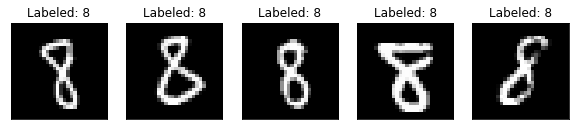

In [21]:
n_samples_show = 5

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows = 1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()
    
    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))
    
    n_samples_show -= 1

In [22]:
#Half of the data is used for validation

n_samples = 50

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx = np.append(np.where(X_test.targets == 5)[0][:n_samples],
                np.where(X_test.targets == 6)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)